# *XG_BOOST using Randomised Cv*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


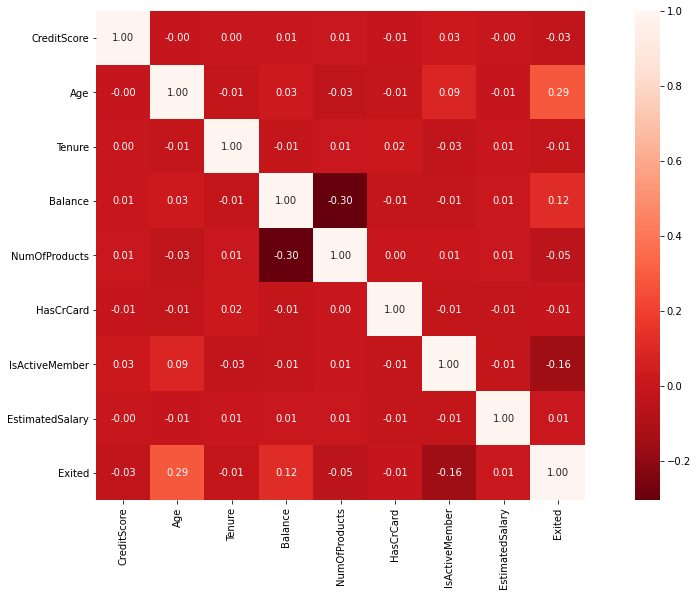

In [ ]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':10},cmap='Reds_r')

In [ ]:
for col in df.columns:
  print(col,',','Unique:',len(df[col].unique()))

CreditScore , Unique: 460
Geography , Unique: 3
Gender , Unique: 2
Age , Unique: 70
Tenure , Unique: 11
Balance , Unique: 6382
NumOfProducts , Unique: 4
HasCrCard , Unique: 2
IsActiveMember , Unique: 2
EstimatedSalary , Unique: 9999
Exited , Unique: 2


In [ ]:
df.isnull().count()

CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df.groupby('Geography').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


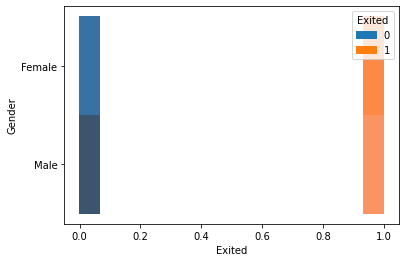

In [ ]:
sns.histplot(y='Gender',x='Exited',data=df,hue='Exited')

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['Geography'] =encoder.fit_transform(df['Geography'])
df['Gender']=encoder.fit_transform(df['Gender'])

In [ ]:
df['Geography'].describe()

count    10000.000000
mean         0.746300
std          0.827529
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: Geography, dtype: float64

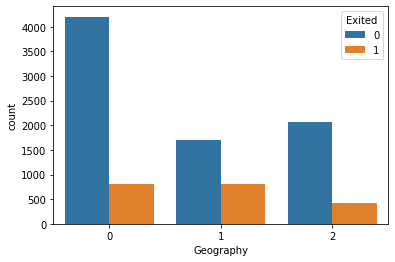

In [ ]:
sns.countplot(x='Geography',data=df,hue='Exited')

In [ ]:
df['Exited'].unique()

array([1, 0])

In [ ]:
(df['Exited']).value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import xgboost

In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
classifer =xgboost.XGBClassifier()

In [ ]:
classifer.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred=classifer.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
print('Accuracy_Score :',metrics.accuracy_score(y_test,y_pred))

Accuracy_Score : 0.868


In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
random_search_cv=RandomizedSearchCV(classifer,param_distributions=params,n_iter=5,n_jobs=1,cv=5,verbose=3)

In [ ]:
random_search_cv.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] min_child_weight=7, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_child_weight=7, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.4, score=0.868, total=   0.7s
[CV] min_child_weight=7, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  min_child_weight=7, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.4, score=0.859, total=   0.6s
[CV] min_child_weight=7, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.4 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV]  min_child_weight=7, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.4, score=0.852, total=   0.6s
[CV] min_child_weight=7, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.4 
[CV]  min_child_weight=7, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.4, score=0.855, total=   0.6s
[CV] min_child_weight=7, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.4 
[CV]  min_child_weight=7, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.4, score=0.864, total=   0.6s
[CV] min_child_weight=1, max_depth=15, learning_rate=0.05, gamma=0.0, colsample_bytree=0.5 
[CV]  min_child_weight=1, max_depth=15, learning_rate=0.05, gamma=0.0, colsample_bytree=0.5, score=0.862, total=   1.0s
[CV] min_child_weight=1, max_depth=15, learning_rate=0.05, gamma=0.0, colsample_bytree=0.5 
[CV]  min_child_weight=1, max_depth=15, learning_rate=0.05, gamma=0.0, colsample_bytree=0.5, score=0.855, total=   1.0s
[CV] min_child_weight=1, max_dep

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   16.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [ ]:
random_search_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.15, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
random_search_cv.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.4,
 'learning_rate': 0.15,
 'max_depth': 6,
 'min_child_weight': 3}

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifer,X,y,cv=10)

In [ ]:
score

array([0.868, 0.856, 0.88 , 0.866, 0.861, 0.848, 0.867, 0.88 , 0.856,
       0.86 ])

In [ ]:
score.mean()

0.8642